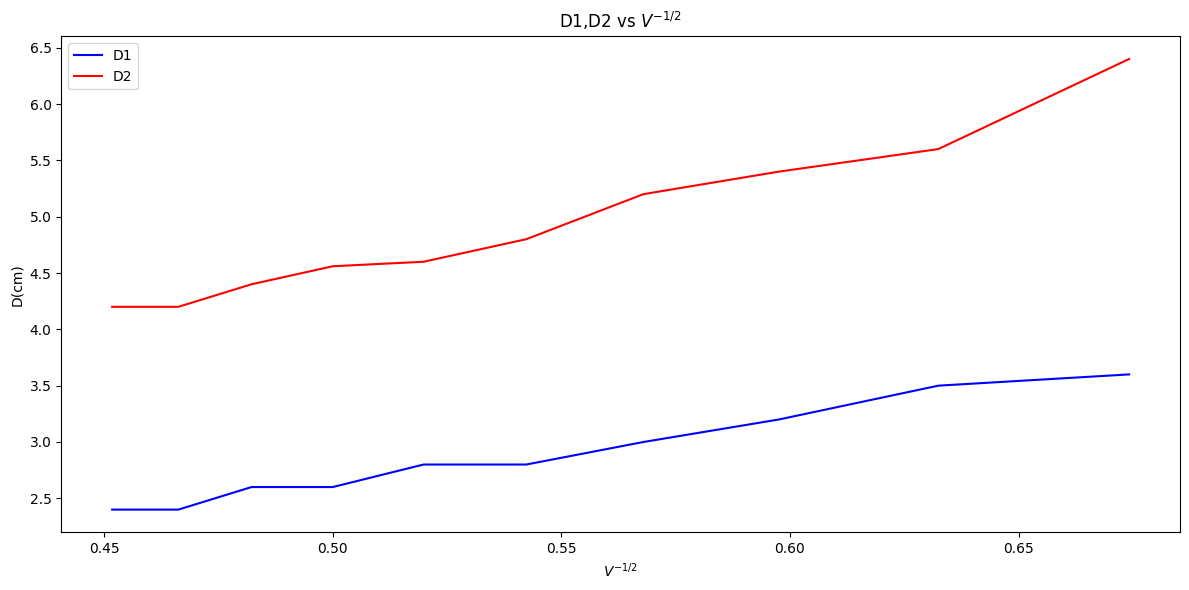

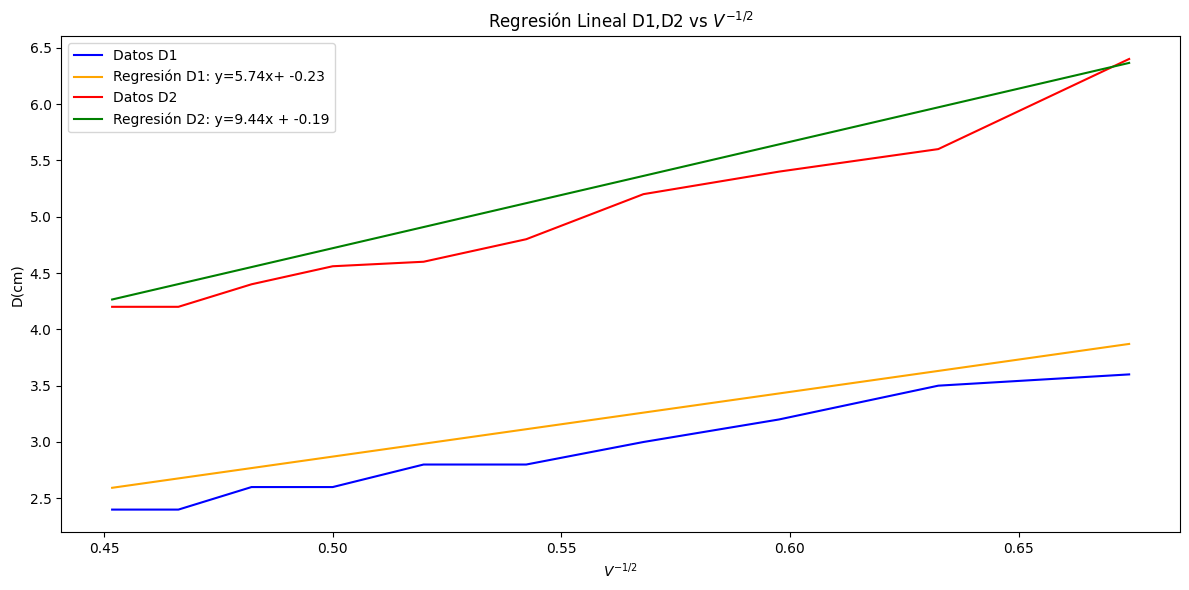

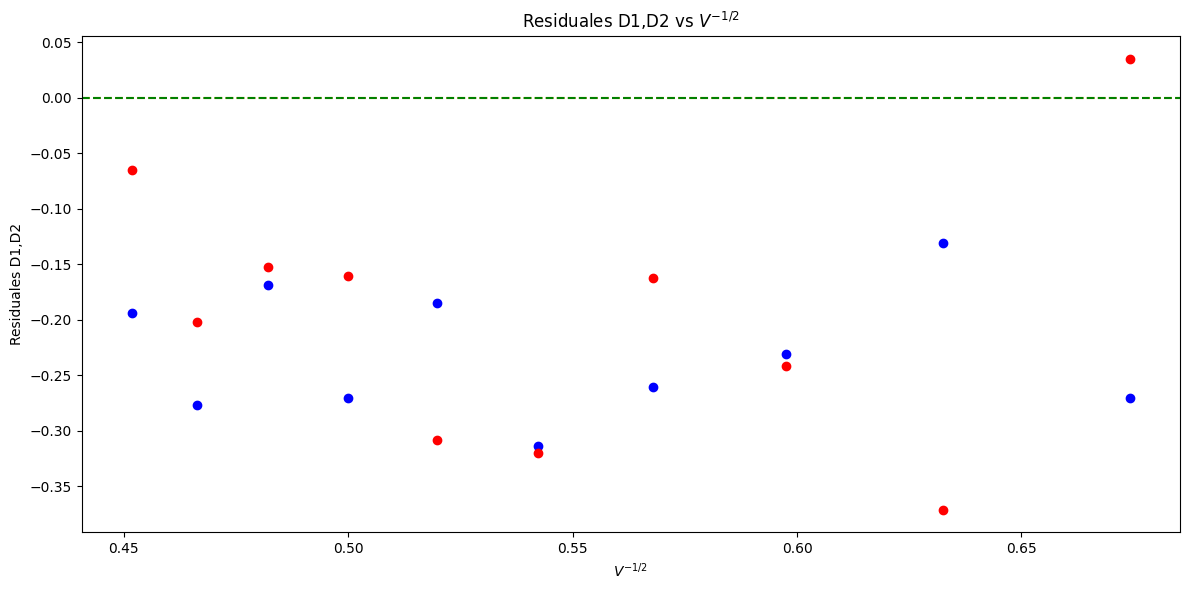

Pendiente D1: 5.74, Incertidumbre: 0.28
Pendiente D2: 9.44, Incertidumbre: 0.59


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos proporcionados
U = np.array([2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4, 4.3, 4.6, 4.9])
D1 = np.array([3.6, 3.5, 3.2, 3, 2.8, 2.8, 2.6, 2.6, 2.4, 2.4])
D2 = np.array([6.4, 5.6, 5.4, 5.2, 4.8, 4.6, 4.56, 4.4, 4.2, 4.2])

# Calculando V^{-1/2}
V_inv_sqrt = 1 / np.sqrt(U)

# Graficando D1 y D2 contra V^{-1/2}
plt.figure(figsize=(12, 6))


plt.plot(V_inv_sqrt, D1, color='blue', label='D1')
plt.xlabel('$V^{-1/2}$')
plt.ylabel('D(cm)')
plt.title('D1,D2 vs $V^{-1/2}$')
plt.legend()
plt.plot(V_inv_sqrt, D2, color='red', label='D2')
plt.legend()

plt.tight_layout()
plt.show()

# Realizando la regresión lineal para D1 y D2
slope_D1, intercept_D1, r_value_D1, p_value_D1, std_err_D1 = linregress(V_inv_sqrt, D1)
slope_D2, intercept_D2, r_value_D2, p_value_D2, std_err_D2 = linregress(V_inv_sqrt, D2)

# Ajustando la regresión para pasar por el origen
slope_D1_origin, _, _, _, _ = linregress(V_inv_sqrt, D1)
slope_D2_origin, _, _, _, _ = linregress(V_inv_sqrt, D2)

# Calculando las líneas de regresión
line_D1 = slope_D1_origin * V_inv_sqrt
line_D2 = slope_D2_origin * V_inv_sqrt

# Graficando las regresiones
plt.figure(figsize=(12, 6))


plt.plot(V_inv_sqrt, D1, color='blue', label='Datos D1')
plt.plot(V_inv_sqrt, line_D1, color='orange', label=f'Regresión D1: y={slope_D1_origin:.2f}x+ {intercept_D1:.2f}')
plt.xlabel('$V^{-1/2}$')
plt.legend()
plt.plot(V_inv_sqrt, D2, color='red', label='Datos D2')
plt.plot(V_inv_sqrt, line_D2, color='green', label=f'Regresión D2: y={slope_D2_origin:.2f}x + {intercept_D2:.2f}')
plt.ylabel('D(cm)')
plt.title('Regresión Lineal D1,D2 vs $V^{-1/2}$')
plt.legend()

plt.tight_layout()
plt.show()

# Graficando los residuales
residuals_D1 = D1 - line_D1
residuals_D2 = D2 - line_D2

plt.figure(figsize=(12, 6))

plt.scatter(V_inv_sqrt, residuals_D1, color='blue')
plt.axhline(0, color='orange', linestyle='--')
plt.scatter(V_inv_sqrt, residuals_D2, color='red')
plt.axhline(0, color='green', linestyle='--')
plt.xlabel('$V^{-1/2}$')
plt.ylabel('Residuales D1,D2')
plt.title('Residuales D1,D2 vs $V^{-1/2}$')

plt.tight_layout()
plt.show()

# Resultados de la pendiente y la incertidumbre
print(f"Pendiente D1: {slope_D1_origin:.2f}, Incertidumbre: {std_err_D1:.2f}")
print(f"Pendiente D2: {slope_D2_origin:.2f}, Incertidumbre: {std_err_D2:.2f}")


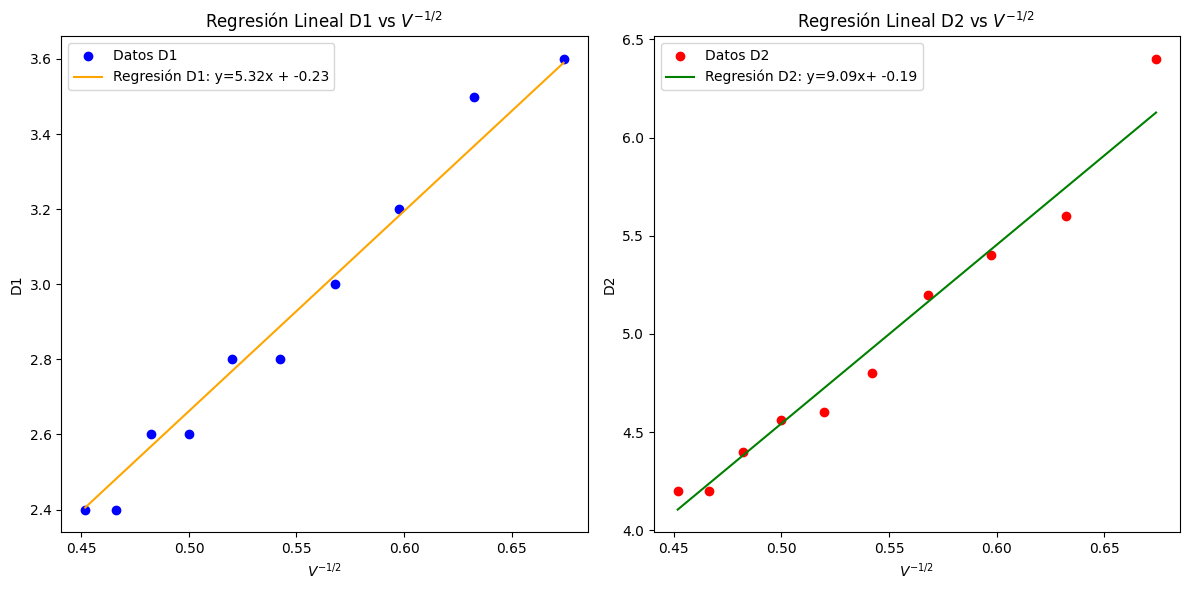

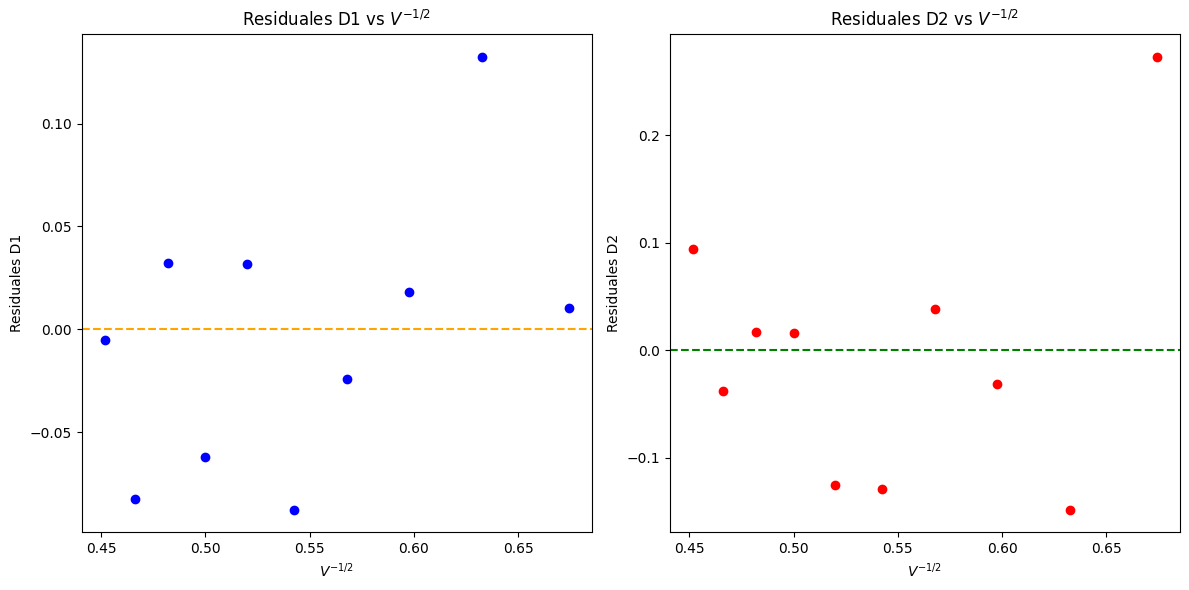

Pendiente D1: 5.32, Incertidumbre: 0.04
Pendiente D2: 9.09, Incertidumbre: 0.07


In [17]:


# Datos proporcionados
U = np.array([2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4, 4.3, 4.6, 4.9])
D1 = np.array([3.6, 3.5, 3.2, 3, 2.8, 2.8, 2.6, 2.6, 2.4, 2.4])
D2 = np.array([6.4, 5.6, 5.4, 5.2, 4.8, 4.6, 4.56, 4.4, 4.2, 4.2])

# Calculando V^{-1/2}
V_inv_sqrt = 1 / np.sqrt(U)

# Realizando la regresión lineal forzada al origen para D1 y D2
def linear_regression_through_origin(x, y):
    slope = np.sum(x * y) / np.sum(x * x)
    return slope

slope_D1_origin = linear_regression_through_origin(V_inv_sqrt, D1)
slope_D2_origin = linear_regression_through_origin(V_inv_sqrt, D2)

# Calculando las líneas de regresión
line_D1 = slope_D1_origin * V_inv_sqrt
line_D2 = slope_D2_origin * V_inv_sqrt

# Graficando D1 y D2 contra V^{-1/2} con las regresiones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(V_inv_sqrt, D1, color='blue', label='Datos D1')
plt.plot(V_inv_sqrt, line_D1, color='orange', label=f'Regresión D1: y={slope_D1_origin:.2f}x + {intercept_D1:.2f}')
plt.xlabel('$V^{-1/2}$')
plt.ylabel('D1')
plt.title('Regresión Lineal D1 vs $V^{-1/2}$ ')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(V_inv_sqrt, D2, color='red', label='Datos D2')
plt.plot(V_inv_sqrt, line_D2, color='green', label=f'Regresión D2: y={slope_D2_origin:.2f}x+ {intercept_D2:.2f}')
plt.xlabel('$V^{-1/2}$')
plt.ylabel('D2')
plt.title('Regresión Lineal D2 vs $V^{-1/2}$ ')
plt.legend()

plt.tight_layout()
plt.show()

# Graficando los residuales
residuals_D1 = D1 - line_D1
residuals_D2 = D2 - line_D2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(V_inv_sqrt, residuals_D1, color='blue')
plt.axhline(0, color='orange', linestyle='--')
plt.xlabel('$V^{-1/2}$')
plt.ylabel('Residuales D1')
plt.title('Residuales D1 vs $V^{-1/2}$')

plt.subplot(1, 2, 2)
plt.scatter(V_inv_sqrt, residuals_D2, color='red')
plt.axhline(0, color='green', linestyle='--')
plt.xlabel('$V^{-1/2}$')
plt.ylabel('Residuales D2')
plt.title('Residuales D2 vs $V^{-1/2}$')

plt.tight_layout()
plt.show()

# Incertidumbre de la pendiente
def slope_uncertainty(x, y, slope):
    residuals = y - slope * x
    residual_sum_of_squares = np.sum(residuals**2)
    uncertainty = np.sqrt(residual_sum_of_squares / (len(y) - 1)) / np.sqrt(np.sum(x**2))
    return uncertainty

uncertainty_D1 = slope_uncertainty(V_inv_sqrt, D1, slope_D1_origin)
uncertainty_D2 = slope_uncertainty(V_inv_sqrt, D2, slope_D2_origin)

# Resultados de la pendiente y la incertidumbre
print(f"Pendiente D1: {slope_D1_origin:.2f}, Incertidumbre: {uncertainty_D1:.2f}")
print(f"Pendiente D2: {slope_D2_origin:.2f}, Incertidumbre: {uncertainty_D2:.2f}")
